In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = yf.download('META', start='2022-08-10')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df['SMA'] = df.Close.rolling(window=20).mean() # SMA calculation

In [4]:
df['stddev'] = df.Close.rolling(window=20).std()
df['Upper'] = df.SMA + 2*df.stddev
df['Lower'] = df.SMA - 2*df.stddev
df['Buy_signal'] = np.where(df.Lower > df.Close, True, False)
df['Sell_signal'] = np.where(df.Upper < df.Close, True, False)

In [5]:
df = df.dropna()

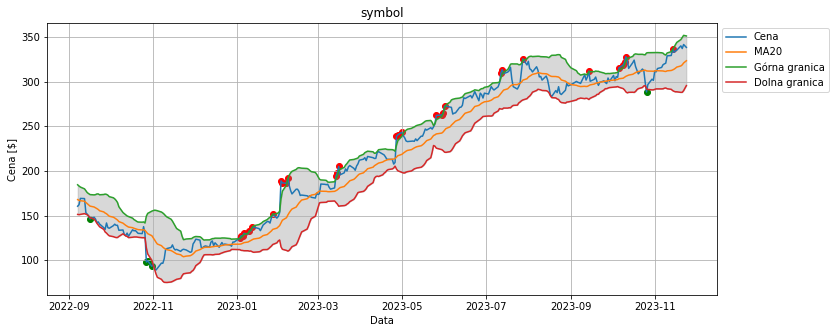

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.index[df.Buy_signal], df[df.Buy_signal].Close, marker='o', color='g')
plt.scatter(df.index[df.Sell_signal], df[df.Sell_signal].Close, marker='o', color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.xlabel('Data')
plt.ylabel('Cena [$]')
plt.legend(['Cena', 'MA20', 'Górna granica', 'Dolna granica'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('symbol')
plt.grid()
plt.show()

In [7]:

buys = [] 
sells = []
open_pos = False
for i in range(len(df)):
    if df. Lower[i] > df.Close[i]: 
        if open_pos == False:
            buys.append(i)
            open_pos = True
    elif df.Upper[i] < df.Close[i]:
        if open_pos:
            sells.append(i)
            open_pos = False

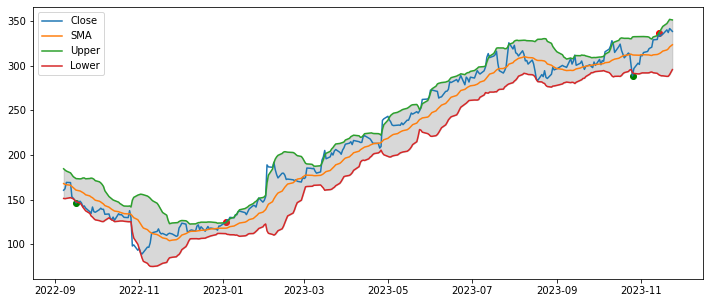

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker='o', color='g')
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker='o', color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])
plt.show()

In [9]:
merged = pd.concat([df.iloc[buys].Close, df.iloc[sells].Close], axis=1)
merged.columns = ['Buys', 'Sells']

In [10]:
totalprofit = merged.shift(-1).Sells - merged.Buys

In [11]:
relprofit = (merged.shift(-1).Sells - merged.Buys)/merged.Buys

In [12]:
profit = relprofit.mean() + 1

In [13]:
1000 * profit

1009.5077499472325